<h1 align = center>Programming for Data Analytics Project 2</h1>
<h2 align = center>Stephen Caulfield</h2>
<h2 align = center>G00398240</h2>

______________________________________________________________________________________________________________________________

<h2>Overview of Project</h2>
    <p>This project will investigate the Wisconsin Breast Cancer dataset. These are the requirements for the project</p>
<ul>
    <li>Undertake an analysis/review of the dataset and present an overview and background</li>
    <li>Provide a literature review on classifiers which have been applied to the dataset and compare their performance</li>
    <li>Present a statistical analysis of the dataset</li>
    <li>Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detailing rationale for the parameter selections you made while training the classifiers.</li>
    <li>Compare, contrast and critique your results with reference to the literature</li>
    <li>Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints</li>
</ul>

<h2>What is Breast Cancer?</h2>
<img src = https://www.cdc.gov/cancer/breast/basic_info/images/female-breast-diagram-750px.jpg?_=41558 align = right style="width:170x;height:170px;">
<p>Breast is one of many forms of Cancer. It happens when cells in the breast grow out of control. There are different types of breast cancer depending on which cells in the breast turn into cancer. The breast consists of three parts, being the lobules, ducts and connective tissue.</p>
<p>The breast cancer usually begins in the ducts or lobules and it can spread outside the breast of which it has then metastasized.</p>
<p>The most common types of breast cancer are:
    <ul>
        <li>Invasive ductal carcinoma where the cancer cell begins in the ducts and grow outside the ducts into other parts of breast tissue, and possibly into to other body parts</li>
        <li>invasive Lobular carcinoma where cancer begins in the lobules and spread the lobules to breast tissue nearby. This can also spread to other body parts</li>

<h2>Overview of Wisconsin Breast Cancer Dataset</h2>

<p>Dataset Title: Wisconsin Breast Cancer Database (January 8, 1991)</p>
<p>Source: Dr. WIlliam H. Wolberg (physician), University of Wisconsin Hospitals, Madison, Wisconsin, USA</p>

<h3>Attribute Information</h3>
<p>Below is a truncated description of each attribute in the data set, the data set its contains specific statistics that can be easily analysed with my code.</p>
<ol>
    <li>ID number</li>
    <li>Diagnosis (M = malignant, B = benign) </li>
    <li>Radius (mean of distances from center to points on the perimeter) </li>
    <li>Texture (standard deviation of gray-scale values) </li>
    <li>Perimeter </li>
    <li>Area</li>
    <li>Smoothness (local variation in radius lengths) </li>
    <li>Compactness (perimeter^2 / area - 1.0) </li>
    <li>Concavity (severity of concave portions of the contour) 0</li>
    <li>Symmetry </li>
    <li>Fractal dimension ("coastline approximation" - 1)</li>
</ol>

<p>There are a few instances of missing attributes in the data set, they will not be included in the analysis of the data set.</p>

______________________________________________________________________________________________________________________________

<h2>Packages</h2>

In [109]:
import csv

import numpy as np

import pandas as pd

from pandas.plotting import scatter_matrix

import seaborn as sns

import random

from scipy.stats import norm

import statistics

import matplotlib.pyplot as plt

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

<h2>Data set imported</h2>
<p>I am using the python package Pandas here to turn the data set into a dataframe that can be presented through python in a presentable fashion. It also provides a suitable platform for the data to be manipulated wherever I see fit.

In [110]:
file = "data.csv"

main_df = pd.read_csv(file, delimiter=",")

main_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


This verifies how many missing values there are

In [111]:
#Shows missing values in dataframe.
main_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Verifies data type of each column.

In [112]:
#Shows data type of each column
print(main_df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Shows the size of the data frame.

In [113]:
print (main_df.shape)

(569, 33)


ID is a column I have deem to be a redundant column for this analysis as there is no statistical knowledge to be earned from its analysis. So it will be removed.

In [114]:
main_df = main_df.drop(["id", "Unnamed: 32"], axis = 1)

main_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h2>General statistics</h2>

In [115]:
main_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2>Benign vs Malignant Analysis</h2>
<p> Through observing the data set I came to the conclusion that the most fruitful way to analyse this data set would be to compare the statistical outcomes of the two different type of Diagnostics: Benign and Malignant.</p>

- Benign Tumors do not grow/spread and are not considered cancerous.

- Malignant Tumors do grow and spread in the body. These are considered cancerous.

<p>Below is a pie chart of how they are divided in the dataset</p>

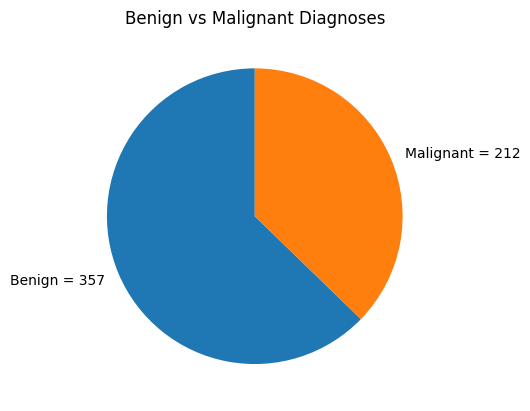

In [116]:
diag = main_df['diagnosis'].value_counts()
benign = f'Benign = {diag[0]}'
malig = f'Malignant = {diag[1]}'
diag_title = [benign, malig]
plt.pie(diag, labels=diag_title,startangle=90)
plt.title('Benign vs Malignant Diagnoses')
plt.show();

The divide of the two diagnostics should not meaningfully change the outcomes of the statistical analysis as they should have extreme differences.

______________________________________________________________________________________________________________________________

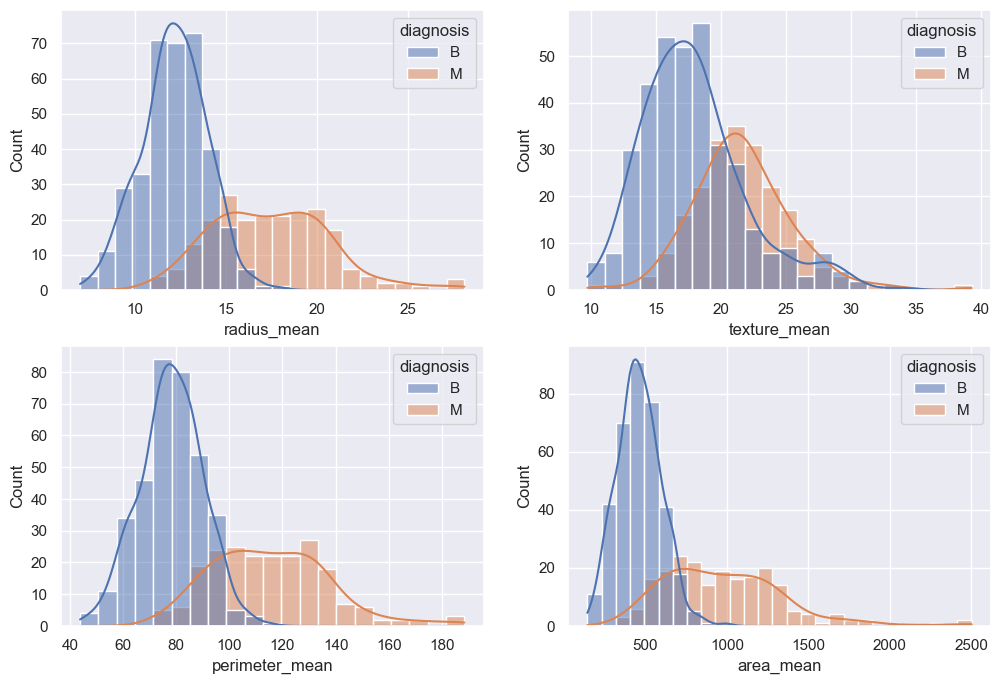

In [128]:
sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)

sns.histplot(data=main_df, x='radius_mean', hue='diagnosis',ax=axes[0,0],kde=True)
sns.histplot(data=main_df, x='texture_mean', hue='diagnosis',ax=axes[0,1],kde=True)
sns.histplot(data=main_df, x='perimeter_mean', hue='diagnosis',ax=axes[1,0],kde=True)
sns.histplot(data=main_df, x='area_mean', hue='diagnosis',ax=axes[1,1],kde=True)
plt.show()

Above details 

<h1>References</h1>
<ol>
    <li><a href = https://www.cdc.gov/cancer/breast/basic_info/what-is-breast-cancer.htm> CDC: Center for Disease Control and Prevention</a></li>
    <li><a href = https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)> UCI Machine Learning Repository: Breast Cancer Wisconsin (Original) Data Set</a></li>
    <li><a href = https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data>Kaggle:Wisconsin Diagnostic Breast Cancer Dataset</a></li>
    <li><a href = https://stackoverflow.com/>StackOverflow</li>
    <li><a href = https://www.w3schools.com/>W3Schools</li>
    <li></li>
    <li></li>
    
</ol>
<h3>Python Packages</h3>
<ol>
    <li><a href = https://numpy.org/>Numpy</a></li>
    <li><a href = https://pandas.pydata.org/>Pandas</a></li>
    <li><a href = https://seaborn.pydata.org/>Seaborn</a></a></a></a></a></a></li>
    <li><a href = https://matplotlib.org/>MatPlotLib</a></li>
    <li><a href = https://docs.python.org/3/library/random.html>Random</a></li>
    <li><a href = https://docs.python.org/3/library/math.html>Math</a></li>
    <li><a href = https://scikit-learn.org/stable/>Sklearn</a></li>
    <li><a href = https://scipy.org/>Scipy</a></li>
</ol>